In [135]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import locale


In [156]:
df_inmuebles=pd.read_csv('./inmuebles_bogota.csv')

In [157]:
df_inmuebles.shape

(9520, 8)

In [158]:
df_inmuebles.columns

Index(['Tipo', 'Descripcion', 'Habitaciones', 'Baños', 'Área', 'Barrio', 'UPZ',
       'Valor'],
      dtype='object')

In [159]:
columnas={'Baños':'Banos','Área':'Area','Valor':'Precio'}
df_inmuebles=df_inmuebles.rename(columns=columnas)
df_inmuebles.sample(3)

,Tipo,Descripcion,Habitaciones,Banos,Area,Barrio,UPZ,Precio
9370,Apartamento,Apartamento en venta en Ciudad Salitre,3,2,70,Ciudad Salitre,Ciudad Salitre Oriental,$ 360.000.000
2254,Apartamento,Apartamento en venta en Bella Suiza,2,2,60,Bella Suiza,USAQUÉN: Country Club + Santa Bárbara,$ 384.000.000
2241,Casa,Casa en venta en Alhambra,3,2,197,Alhambra,La Alhambra,$ 1.100.000.000


Tratando columna Precio 

In [160]:
df_inmuebles['Precio'] = df_inmuebles['Precio'].str.replace('[$,. ]', '', regex=True)
df_inmuebles['Precio'] = pd.to_numeric(df_inmuebles['Precio'])

In [185]:
df_inmuebles.head(1)

,Tipo,Descripcion,Habitaciones,Banos,Area,Barrio,UPZ,Precio
0,Apartamento,Apartamento en venta en Zona Noroccidental,3,2,70,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,360000000.0


In [162]:
df_inmuebles['Precio'] = df_inmuebles['Precio'].astype(float)

In [184]:
df_inmuebles.sample(3)

,Tipo,Descripcion,Habitaciones,Banos,Area,Barrio,UPZ,Precio
6727,Apartamento,Apartamento en venta en Bosa,2,1,43,Bosa,Bosa Central,119000000.0
1106,Apartamento,Apartamento en venta en Santa Barbara,3,3,112,Santa Barbara,USAQUÉN: Country Club + Santa Bárbara,630000000.0
5642,Apartamento,Apartamento en venta en San Cipriano,3,2,75,San Cipriano,Britalia,350000000.0


UPZ= Son áreas urbanas más pequeñas que las localidades y más grandes que el barrio. La función de las UPZ es servir de unidades territoriales o sectores para planificar el desarrollo urbano en el nivel zonal. Son un instrumento de planificación para poder desarrollar una norma urbanística en el nivel de detalle que requiere Bogotá, debido a las grandes diferencias que existen entre unos sectores y otros

In [186]:
df_inmuebles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9520 entries, 0 to 9519
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Tipo          9520 non-null   object 
 1   Descripcion   9520 non-null   object 
 2   Habitaciones  9520 non-null   int64  
 3   Banos         9520 non-null   int64  
 4   Area          9520 non-null   int64  
 5   Barrio        9520 non-null   object 
 6   UPZ           9478 non-null   object 
 7   Precio        9520 non-null   float64
dtypes: float64(1), int64(3), object(4)
memory usage: 595.1+ KB


In [187]:
df_inmuebles['UPZ'].unique().shape

(64,)

In [189]:
df_inmuebles['Barrio'].unique().shape

(149,)

In [190]:
df_inmuebles.Barrio.value_counts()

Usaquén               1105
Zona Noroccidental     877
Bosa                   589
Kennedy                589
Cedritos               554
                      ... 
Colinas De Suba          1
La Estanzuela            1
Roma                     1
Alameda                  1
Prado Veraniego          1
Name: Barrio, Length: 149, dtype: int64

In [191]:
inmuebles_barrio=df_inmuebles.Barrio.value_counts()

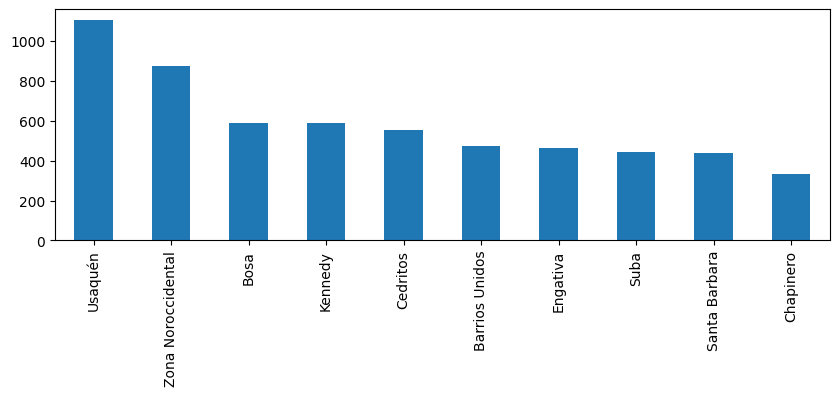

In [192]:
fig, ax = plt.subplots(figsize=(10, 3))
inmuebles_barrio.head(10).plot.bar(x='Barrio', y='Valor', ax=ax)
plt.show()

1.- Promedio de area de todos los inmuebles en los barrios del dataframe.El top 10 de promedios. 
2.-Conteo, mediana, valor min, valor max. 

Barrios

In [193]:
Barrios=(df_inmuebles['Barrio'].unique().tolist())

In [194]:
barrios=[]
Area_promedio=[]
for bar in Barrios:
    barrios.append(bar)
    Area_promedio.append(df_inmuebles[df_inmuebles.Barrio==bar]['Area'].mean())

data = {'Barrio': barrios, 'Promedio Area (m2)': Area_promedio}
df_promedios_area = pd.DataFrame(data)
df_promedios_area = df_promedios_area.sort_values(by='Promedio Area (m2)', ascending=False)

In [195]:
df_promedios_area.head(10)

,Barrio,Promedio Area (m2)
35,Modelia,4316.750000
124,Libertador,642.000000
119,Bosa Piamonte,400.000000
81,La Soledad,378.625000
106,Restrepo,336.500000
126,Santa Librada,328.000000
125,Las Ferias,320.000000
82,Santa Ana,309.375000
86,Veraguas,302.666667
84,Bellavista Occidental,286.200000


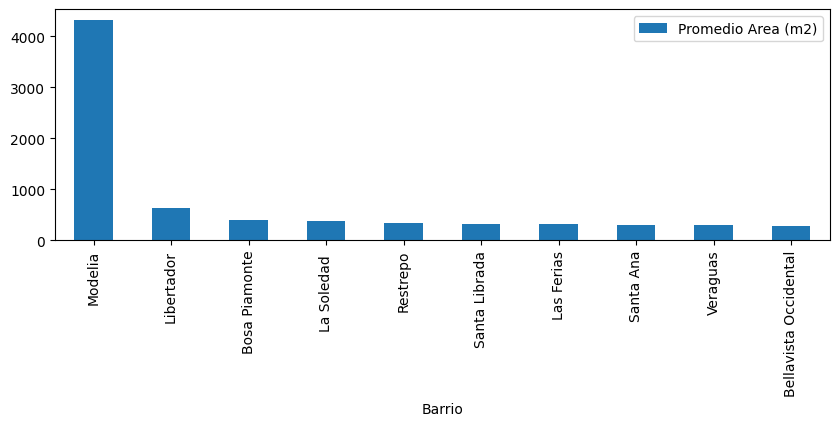

In [196]:
fig, ax = plt.subplots(figsize=(10, 3))
df_promedios_area.head(10).plot.bar(x='Barrio', y='Promedio Area (m2)', ax=ax)
plt.show()

¿Que hay en Modelia? 

In [197]:
df_inmuebles[df_inmuebles.Barrio=='Modelia'].describe()

,Habitaciones,Banos,Area,Precio
count,40.00000,40.000000,40.000000,4.000000e+01
mean,3.67500,2.775000,4316.750000,7.054698e+08
std,1.22762,0.973692,26259.427757,2.457464e+08
min,2.00000,1.000000,48.000000,2.600000e+08
25%,3.00000,2.000000,87.750000,5.449975e+08
50%,3.00000,3.000000,155.500000,7.250000e+08
75%,4.00000,3.000000,224.000000,8.525000e+08
max,8.00000,6.000000,166243.000000,1.200000e+09


Valor atipico en el area 

In [ ]:
df_inmuebles[df_inmuebles.Barrio=='Modelia']['']

In [205]:
df_inmuebles[(df_inmuebles['Area'] > 224) & (df_inmuebles['Barrio'] == 'Modelia')]

,Tipo,Descripcion,Habitaciones,Banos,Area,Barrio,UPZ,Precio
1283,Casa,Casa en venta en Modelia,8,4,236,Modelia,Fontibón,1.120000e+09
2147,Casa,Casa en venta en Modelia,5,4,320,Modelia,Fontibón,7.500000e+08
2257,Casa,Casa en venta en Modelia,5,4,244,Modelia,Fontibón,9.500000e+08
4913,Casa,Casa en venta en Modelia,5,4,320,Modelia,Fontibón,7.500000e+08
4914,Casa,Casa en venta en Modelia,5,4,320,Modelia,Fontibón,7.500000e+08
5059,Casa,Casa en venta en Modelia,7,6,287,Modelia,Fontibón,7.500000e+08
7073,Casa,Casa en venta en Modelia,4,3,166243,Modelia,Fontibón,8.500000e+08
7908,Casa,Casa en venta en Modelia,3,3,275,Modelia,Fontibón,8.500000e+08
8562,Casa,Casa en venta en Modelia,5,4,400,Modelia,Fontibón,9.500000e+08
9326,Casa,Casa en venta en Modelia,5,3,270,Modelia,Fontibón,1.100000e+09
